In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib visualisation style
plt.style.use('seaborn-v0_8-pastel')

[Description of Data Source](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008)

# Exploring diabetic_data.csv

In [2]:
diabetic_df = pd.read_csv('../data/diabetic_data.csv')

In [3]:
diabetic_df.shape

(101766, 50)

In [4]:
for start_i in range(0, 50, 10):
    if start_i < 40:
        end_i = start_i + 10
        print(f'\nColumns {start_i} to {end_i}: \n')
        print(diabetic_df.iloc[:, start_i:end_i].info())
    else:
        end_i = 51
        print(f'\nColumns {start_i} to {end_i - 1}: \n')
        print(diabetic_df.iloc[:, start_i:end_i].info())


Columns 0 to 10: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 7.8+ MB
None

Columns 10 to 20: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 10 columns):
 #   Column           

## Patient Features

Every row in the dataset corresponds to a unique encounter and is uniquely identified by the column `encounter_id`

In [5]:
# Number of unique encounters
print(f'Number of unique encounters: {diabetic_df['encounter_id'].unique().shape[0]}')

Number of unique encounters: 101766


In [6]:
# Number of unique patients
print(f'Number of unique patients: {diabetic_df['patient_nbr'].unique().shape[0]}')

# Patients with greatest number of encounters
diabetic_df['patient_nbr'].value_counts().sort_values(ascending=False).head(10)

Number of unique patients: 71518


patient_nbr
88785891    40
43140906    28
23199021    23
88227540    23
1660293     23
23643405    22
84428613    22
92709351    21
90609804    20
89472402    20
Name: count, dtype: int64

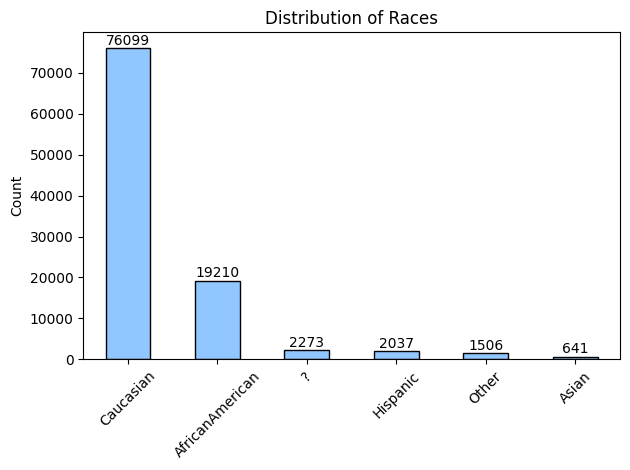

In [97]:
# Distinct values of race
race_counts = diabetic_df['race'].value_counts().sort_values(ascending=False)

# Visualising number of people of each race with bar plot
ax = race_counts.plot(kind='bar', edgecolor='black')
plt.title('Distribution of Races')
plt.xlabel('')
plt.xticks(rotation=45)
plt.ylabel('Count')

for i, value in enumerate(race_counts.values):
    plt.text(x=i, y=value+0.0005*max(race_counts.values), s=str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

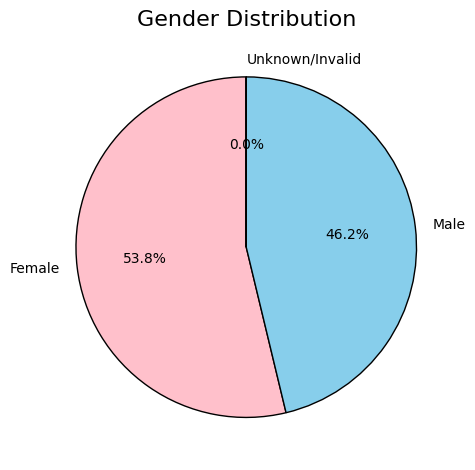

In [8]:
# Distinct values of gender
gender_counts = diabetic_df['gender'].value_counts().sort_values(ascending=False)


plt.pie(gender_counts.values, 
        labels=gender_counts.index, 
        autopct='%1.1f%%', 
        startangle=90,
        colors=['pink', 'skyblue', 'grey'],
        wedgeprops={'edgecolor': 'black'})
plt.title('Gender Distribution', fontsize=16)
plt.tight_layout()
plt.show()

        age  count
0    [0-10)    161
1   [10-20)    691
2   [20-30)   1657
3   [30-40)   3775
4   [40-50)   9685
5   [50-60)  17256
6   [60-70)  22483
7   [70-80)  26068
8   [80-90)  17197
9  [90-100)   2793


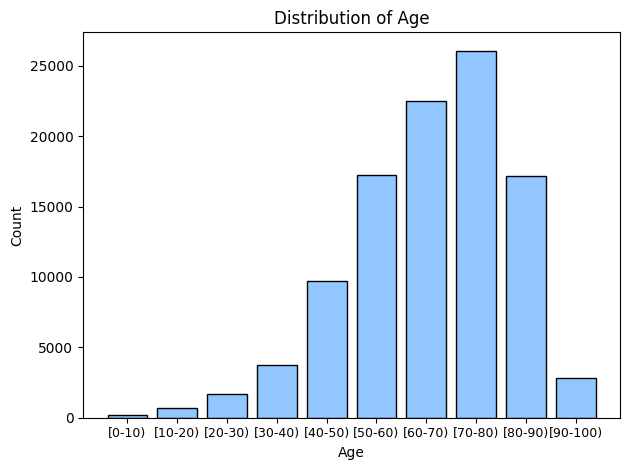

In [9]:
# Age classes
diabetic_df['age']

# Age distribution
diabetic_df['age'].value_counts().sort_values(ascending=False)
age_distribution = diabetic_df['age'].value_counts().sort_index().reset_index()
age_distribution.columns = ['age', 'count']
print(age_distribution)

# Creating bar plot of age distribution
plt.bar(age_distribution['age'], age_distribution['count'], edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(fontsize=9)
plt.tight_layout()
plt.show()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
weight
?            98569
[0-25)          48
[25-50)         97
[50-75)        897
[75-100)      1336
[100-125)      625
[125-150)      145
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64


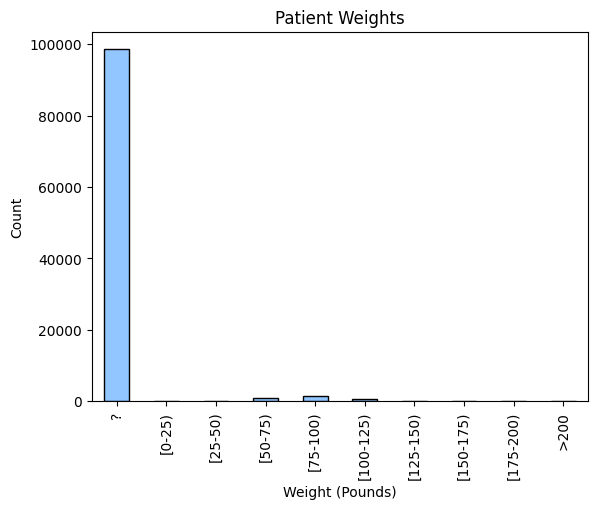

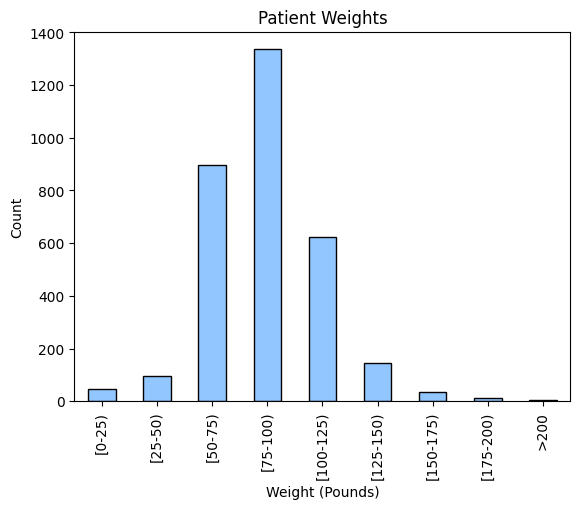

In [10]:
# Patient weight
weight_counts = diabetic_df['weight'].value_counts()
print(weight_counts)

# Create function to extract lower bound of weight brackets for sorting these brackets
def extract_lower_bound(label):
    if label.startswith('['):
        return int(label[1:].split('-')[0])
    elif label.startswith('?'):
        return -1
    elif label.startswith('>'):
        return 9999
    else:
        return 0
    
# Sort age brackets in ascending order
sorted_index = sorted(weight_counts.index, key=extract_lower_bound)
weight_counts = weight_counts.reindex(index=sorted_index)
print(weight_counts)

# Visualise counts of patients in each weight bracket
weight_counts.plot(kind='bar', edgecolor='black')
plt.title('Patient Weights')
plt.xlabel('Weight (Pounds)')
plt.ylabel('Count')
plt.show()

# Visualise counts of patients in each weight bracket (excluding unknown ('?'))
weight_counts[1:].plot(kind='bar', edgecolor='black')
plt.title('Patient Weights')
plt.xlabel('Weight (Pounds)')
plt.ylabel('Count')
plt.show()


## Hospital Information

In [11]:
# Admission types
print(diabetic_df['admission_type_id'].value_counts().sort_index())

admission_type_id
1    53990
2    18480
3    18869
4       10
5     4785
6     5291
7       21
8      320
Name: count, dtype: int64


In [12]:
# Discharge disposition
print(diabetic_df['discharge_disposition_id'].value_counts().sort_index())

discharge_disposition_id
1     60234
2      2128
3     13954
4       815
5      1184
6     12902
7       623
8       108
9        21
10        6
11     1642
12        3
13      399
14      372
15       63
16       11
17       14
18     3691
19        8
20        2
22     1993
23      412
24       48
25      989
27        5
28      139
Name: count, dtype: int64


num_lab_procedures
1      3208
2      1101
3       668
4       378
5       286
       ... 
120       1
121       1
126       1
129       1
132       1
Name: count, Length: 118, dtype: int64
44.0


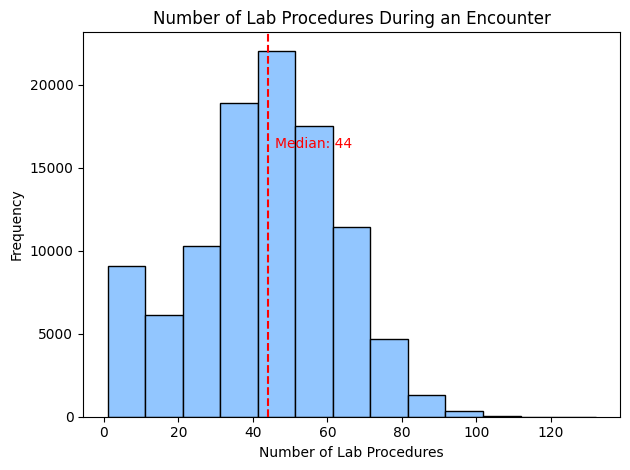

In [13]:
# Number of lab tests performed during an encounter
lab_procedure_counts = diabetic_df['num_lab_procedures'].value_counts().sort_index()
print(lab_procedure_counts)

# Median
lab_procedure_counts_median = diabetic_df['num_lab_procedures'].median()
print(lab_procedure_counts_median)

ax = diabetic_df['num_lab_procedures'].plot(kind='hist', bins=13, edgecolor='black')
ax.axvline(x=lab_procedure_counts_median, color='red', linestyle='dashed', linewidth=1.5)

y_min, y_max = ax.get_ylim()
ax.text(x=lab_procedure_counts_median+2, y=y_max*0.7, s=f'Median: {lab_procedure_counts_median:.0f}', color='red')

plt.title('Number of Lab Procedures During an Encounter')
plt.xlabel('Number of Lab Procedures')
plt.tight_layout()
plt.show()

num_procedures
0    46652
1    20742
2    12717
3     9443
4     4180
5     3078
6     4954
Name: count, dtype: int64


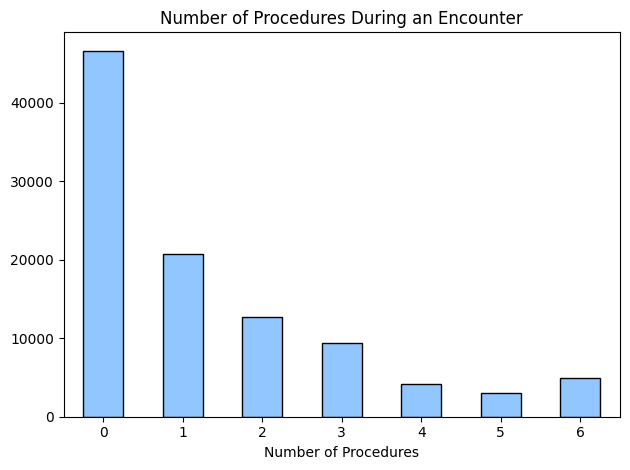

In [14]:
# Number of non-lab procedures during an encounter
procedure_counts = diabetic_df['num_procedures'].value_counts().sort_index()
print(procedure_counts)

procedure_counts.plot(kind='bar', edgecolor='black')
plt.title('Number of Procedures During an Encounter')
plt.xlabel('Number of Procedures')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

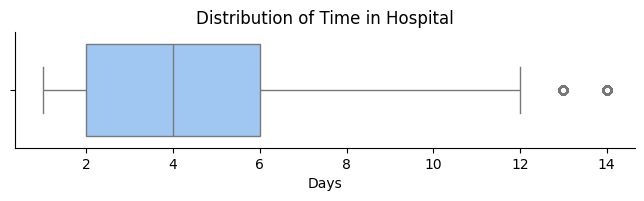

In [15]:
# Time in hospital
time_in_hospital_counts = diabetic_df['time_in_hospital'].value_counts().sort_index()

# Median time in hospital
median_time_in_hospital = diabetic_df['time_in_hospital'].median()

# Create boxplot of time in hospital
plt.figure(figsize=(8, 1.5))
sns.boxplot(
    x='time_in_hospital',
    data=diabetic_df
)

sns.despine()
plt.title('Distribution of Time in Hospital')
plt.xlabel('Days')
plt.ylabel('')
plt.show()

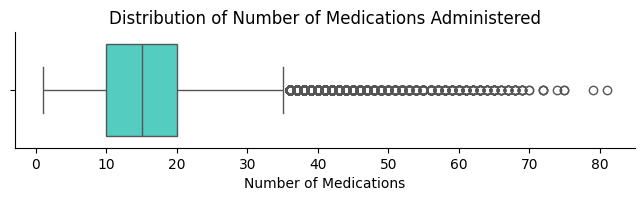

In [16]:
# Number of medications administered during encounter
num_medications_counts = diabetic_df['num_medications'].value_counts().sort_index()
num_medications_counts

# Median number of medications administered
num_medications_median = diabetic_df['num_medications'].median()

# Create boxplot of number of medications administered
plt.figure(figsize=(8, 1.5))
sns.boxplot(
    x='num_medications',
    data=diabetic_df,
    color='turquoise'
)

sns.despine()
plt.title('Distribution of Number of Medications Administered')
plt.xlabel('Number of Medications')
plt.ylabel('')
plt.show()


In [17]:
# Primary diagnoses
diabetic_df['diag_1'].value_counts().sort_values(ascending=False)


diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
833       1
391       1
690       1
10        1
V51       1
Name: count, Length: 717, dtype: int64

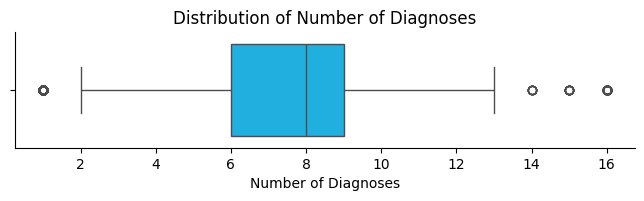

In [18]:
# Number of diagnoses entered into system
number_diagnoses_counts = diabetic_df['number_diagnoses'].value_counts().sort_index()

# Median number of diagnoses entered into system
number_diagnoses_median = diabetic_df['number_diagnoses'].median()

# Create boxplot of number of diagnoses entered into system
plt.figure(figsize=(8, 1.5))
sns.boxplot(
    x='number_diagnoses',
    data=diabetic_df,
    color='deepskyblue'
)

sns.despine()
plt.title('Distribution of Number of Diagnoses')
plt.xlabel('Number of Diagnoses')
plt.ylabel('')
plt.show()

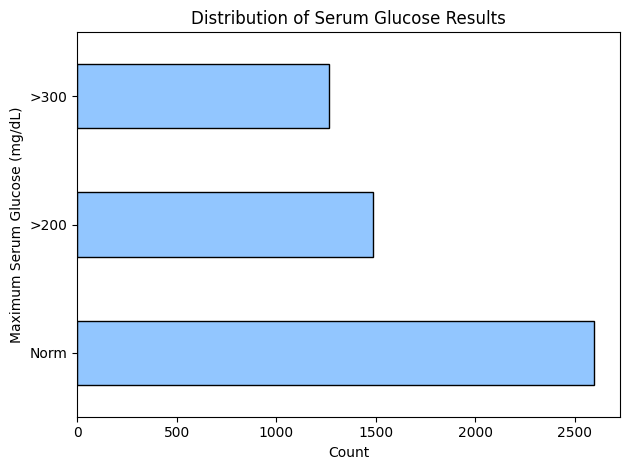

In [19]:
# Max Serum Glucose
max_glu_serum_counts = diabetic_df['max_glu_serum'].value_counts(ascending=False)

# Create bar plot
max_glu_serum_counts.plot(kind='barh', edgecolor='black')
plt.title('Distribution of Serum Glucose Results')
plt.xticks(rotation=0)
plt.xlabel('Count')
plt.ylabel('Maximum Serum Glucose (mg/dL)')
plt.tight_layout()
plt.show()

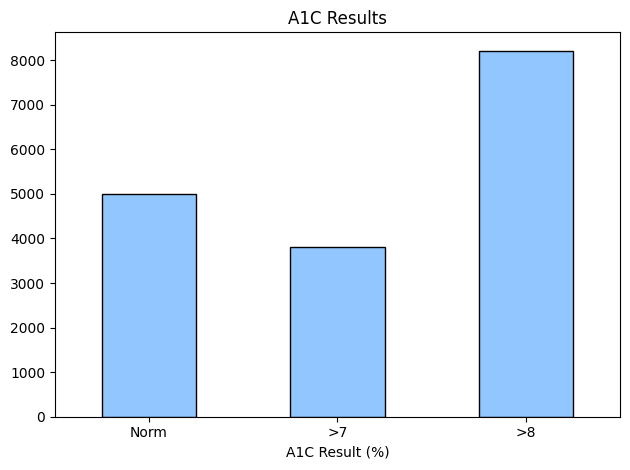

In [20]:
# A1C Result
custom_order = ['Norm', '>7', '>8']
diabetic_df['A1Cresult'] = pd.Categorical(diabetic_df['A1Cresult'], categories=custom_order, ordered=True)
A1Cresult_counts = diabetic_df['A1Cresult'].value_counts().loc[custom_order]


A1Cresult_counts.plot(kind='bar', edgecolor='black')
plt.title('A1C Results')
plt.xticks(rotation=0)
plt.xlabel('A1C Result (%)')
plt.tight_layout()
plt.show()

## Medicines

metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64


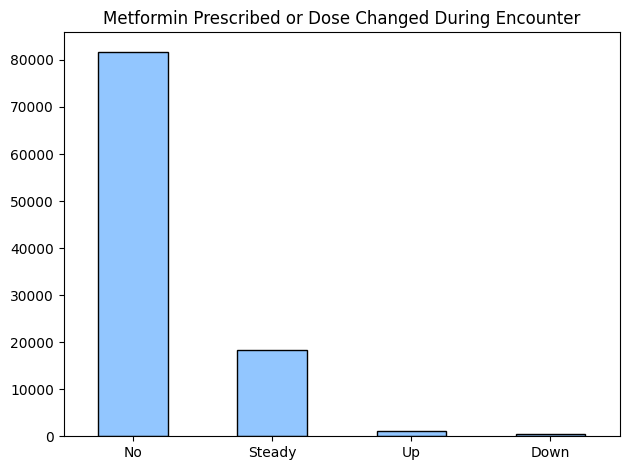

In [21]:
# Looking at one example of various medications - Metformin
metformin_counts = diabetic_df['metformin'].value_counts(ascending=False)
print(metformin_counts)

# Creating bar plot
metformin_counts.plot(kind='bar', edgecolor='black')
plt.title('Metformin Prescribed or Dose Changed During Encounter')
plt.xlabel('')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

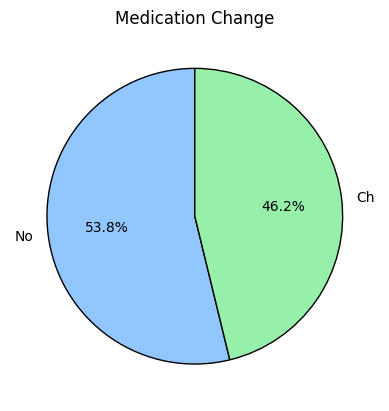

In [49]:
# Medication change - dosage or generic name
change_counts = diabetic_df['change'].value_counts()
change_counts

# Creating pie chart
plt.pie(
    change_counts.values,
    labels=change_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)
plt.title('Medication Change')
plt.show()

diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64


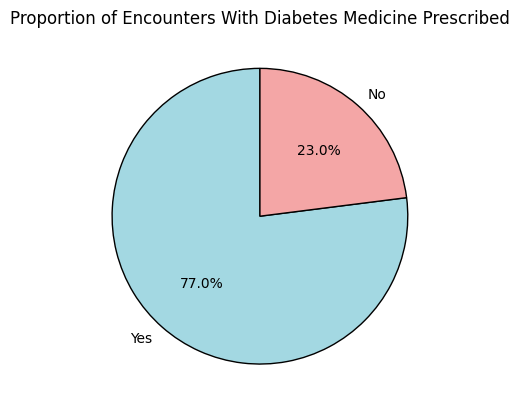

In [56]:
# Diabetes medication prescribed during encounter
diabetesMed_counts = diabetic_df['diabetesMed'].value_counts()
print(diabetesMed_counts)

# Pie chart
plt.pie(
    x=diabetesMed_counts.values,
    labels=diabetesMed_counts.index,
    startangle=90,
    colors=["#A3D8E2", '#F4A6A6'],
    wedgeprops={'edgecolor': 'black'},
    autopct='%1.1f%%'
)

plt.title('Proportion of Encounters With Diabetes Medicine Prescribed')
plt.show()

## Days to Patient Readmission (Target Variable)

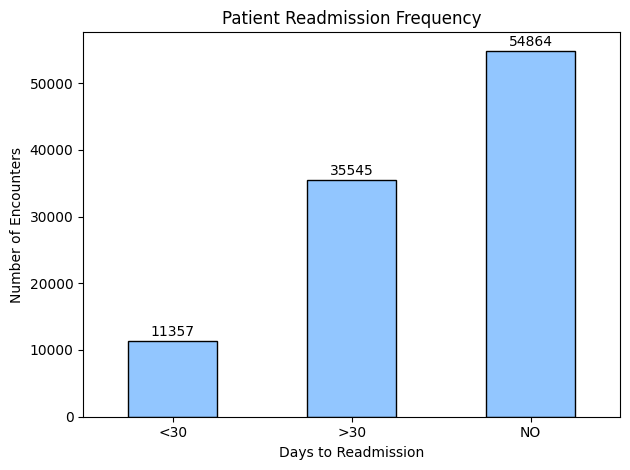

In [84]:
readmitted_counts = diabetic_df['readmitted'].value_counts().sort_values()
readmitted_counts

# Create bar chart
ax = readmitted_counts.plot(kind='bar', edgecolor='black')
plt.title('Patient Readmission Frequency')
plt.xlabel('Days to Readmission')
plt.ylabel('Number of Encounters')
plt.xticks(rotation=0)

for i, value in enumerate(readmitted_counts.values):
    plt.text(i, value+0.005*max(readmitted_counts.values), str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()